### Predicting the Severity of Automobile Accidents in Seattle, Washington ###

In this first week, you will discover your
project objectives, find your dataset that you will use for this capstone project, and publish your
dataset on GitHub.

In the second week, you will build your machine
learning solution.

In the third week,
you will finalize your model and be ready
to submit your work.

To complete capstone,
you will be working on a case study which is to predict the severity
of an accident.
Now, wouldn't it be great if there were something in place that could warn you, 
given the weather and the road conditions,
about the possibility of you getting into a car accident and how severe it would be,
so that you would drive more carefully or even change your travel plans?
Let's use our shared data for Seattle, Washington as an example of how to deal with the accidents data.

In [1]:
# Import common packages for Data Science applications.
import io
import itertools
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import pandas as pd
import pylab as pl
import scipy
import scipy.optimize as opt
import seaborn as sns
import sklearn
import sklearn.linear_model
import sys
from matplotlib.ticker import NullFormatter
from scipy import optimize
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn import metrics
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
# Create a list of display options.
list_of_display_options_fully_qualified_names = str(\
"pd.options.display.chop_threshold, pd.options.display.float_format, pd.options.display.max_info_columns, pd.options.display.notebook_repr_html, \
pd.options.display.colheader_justify, pd.options.display.html, pd.options.display.max_info_rows, pd.options.display.pprint_nest_depth, \
pd.options.display.column_space, pd.options.display.large_repr, pd.options.display.max_rows, pd.options.display.precision, \
pd.options.display.date_dayfirst, pd.options.display.latex, pd.options.display.max_seq_items, pd.options.display.show_dimensions, \
pd.options.display.date_yearfirst, pd.options.display.max_categories, pd.options.display.memory_usage, pd.options.display.unicode, \
pd.options.display.encoding, pd.options.display.max_columns, pd.options.display.min_rows, pd.options.display.width, \
pd.options.display.expand_frame_repr, pd.options.display.max_colwidth, pd.options.display.multi_sparse").split(sep=', ')

# Initialize an empty list to store all the short names for display options.
list_of_display_options_short_names = list()
# For each fully qualified option name,
# get the option's short name and add it to the list of short names.
for fully_qualified_option_name in list_of_display_options_fully_qualified_names:
    # Get short option name.
    short_option_name = fully_qualified_option_name.split(sep='.')[-1]
    
    # Add short option name to list of display option short names.
    list_of_display_options_short_names.append(short_option_name)

# Define dictionary of display option settings.
dict_of_display_option_settings_short_names=\
{"max_info_columns": 1000,\
"colheader_justify": "right",\
"max_info_rows": 1000000,\
"column_space": 1000,\
"max_rows": 1000000,\
"precision": 9,\
"max_seq_items": 1000000000000,\
"show_dimensions": True,\
"max_categories": 1000,\
"memory_usage": True,\
"max_columns": 1000,\
"max_colwidth": 1000,\
"float_format": lambda x: '%.9f' % x}

# Set pandas display options using dictionary of short names,
# and display the options/value pairs.
print("Setting display options...")
for key in list(dict_of_display_option_settings_short_names.keys()):
    # Set display option.
    pd.set_option(key, dict_of_display_option_settings_short_names[key])
    # Print display option name and value.
    print(key, ": ", pd.get_option(key), sep='')

Setting display options...
max_info_columns: 1000
colheader_justify: right
max_info_rows: 1000000
column_space: 1000
max_rows: 1000000
precision: 9
max_seq_items: 1000000000000
show_dimensions: True
max_categories: 1000
memory_usage: True
max_columns: 1000
max_colwidth: 1000
float_format: <function <lambda> at 0x7f974c463790>


In [3]:
# Attribute Information URL: https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf
# Read the Collisions Data CSV file and store it as a DataFrame.
# url="https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv" # HTTPError at 202009151050, using local copy of .csv instead.
# print(os.listdir("..")) # Print list of contents of current working directory.
local_path_to_csv = "../Collisions.csv"
df=pd.read_csv(local_path_to_csv, low_memory=False)

<h2 id="data_wrangling">Data Wrangling</h2>

Steps for working with missing data:
<ol>
    <li>Identify missing data.</li>
    <li>Deal with missing data.</li>
    <li>Correct data format.</li>
</ol>

<h3 id="identifying_missing_data">Identifying Missing Data</h3>

The metadata document that accompanied the data set indicates that certain columns have "sentinel" values
that indicate an unknown or missing value. Each of these missing values will first be converted into NaN.
Subsequently, the NaN values will be dropped from the DataFrame.

In [4]:
# If any row of the collisions DataFrame contains a sentinel value representing "unknown",
# then replace it with NaN. 
# Sentinels for "unknown" are listed in the metadata form that accompanied the dataset.
df_unknowns_converted_to_nan = df.replace(to_replace=\
{"EXCEPTRSNCODE": " ",\
 "EXCEPTRSNDESC": "Not Enough Information, or Insufficient Location Information",\
 "SEVERITYCODE": "0",\
 "SEVERITYDESC": "Unknown",\
 "JUNCTIONTYPE": "Unknown",\
 "WEATHER": "Unknown",\
 "ROADCOND": "Unknown",\
 "LIGHTCOND": "Unknown",\
 "SDOT_COLCODE": float(0),\
 "SDOT_COLDESC": "NOT ENOUGH INFORMATION / NOT APPLICABLE",\
 "ST_COLCODE": " ",\
 "ST_COLDESC": "Not stated"},\
value=np.nan, inplace=False, limit=None, regex=False, method='pad')

df_unknowns_converted_to_nan.replace(to_replace={"ST_COLCODE": "0", }, value=np.nan, inplace=True, limit=None, regex=False, method='pad')

<h3 id="deal_with_missing_data">Deal with Missing Data</h3>

<ol>
    <li>Drop the Data
        <ol>
            <li>Drop entire row.</li>
            <li>Drop entire column.</li>
        </ol>
    </li>
    <li>Replace the Data
        <ol>
            <li>Replace data by mean.</li>
            <li>Replace data by frequency.</li>
            <li>Replace data based on other functions.</li>
        </ol>
    </li>
        
</ol>

Whole columns should be dropped only if most entries in the column are empty.

In [5]:
# Initialize a list to store the labels for the columns with missing data.
list_of_columns_with_missing_data = list()

# For each column in the collisions DataFrame,
# if the column contains at least one NaN, 
# then add the column's label to the list.
for column in list(df_unknowns_converted_to_nan.columns):
    if df_unknowns_converted_to_nan[column].hasnans:
        list_of_columns_with_missing_data.append(column)

In [6]:
# Drop any column from the collisions DataFrame if it satisfies at least one of the following conditions:
# 1) more than 15% of the column's data is NaN;
# 2) the column only contains unique identification keys;
# 3) the column's data is naturally categorical but does not fit into a small (< 50) number of categories;
# 4) infromation in one column is redundant because it is already represented by another column;
# 5) it is not clear how to interpret the column's data.

list_of_columns_to_drop = [\
                           "STATUS",\
                           "OBJECTID",\
                           "INCKEY",\
                           "COLDETKEY",\
                           "REPORTNO",\
                           "INTKEY",\
                           "LOCATION",\
                           "EXCEPTRSNCODE",\
                           "EXCEPTRSNDESC",\
                           "SEVERITYDESC",\
                           "INCDATE",\
                           "SDOT_COLDESC",\
                           "INATTENTIONIND",\
                           "UNDERINFL",\
                           "PEDROWNOTGRNT",\
                           "SDOTCOLNUM",\
                           "SPEEDING",\
                           "ST_COLDESC",\
                           "SEGLANEKEY",\
                           "CROSSWALKKEY"]

In [7]:
# Drop the selected columns from the DataFrame after converting unknowns to NaN.
# and store the result in a new DataFrame.
df_drop_columns = df_unknowns_converted_to_nan.drop(columns=list_of_columns_to_drop, inplace=False)

In [8]:
# Drop any row that contains at least one NaN.
df_drop_columns_and_rows = df_drop_columns.dropna(axis="index", how="any", thresh=None, subset=None, inplace=False)

<h3 id="correct_data_format">Correct Data Format</h3>

Ensure that each data type is appropriate for the corresponding feature.
Convert integer data to "ordered" categorical types, e.g. SEVERITYCODE,
especially if the "integer ordering" of the original data is inappropriate.

If data represents date, time, or date/time information, then convert the data to the appropriate datetime representation.

In [9]:
# Create new DataFrame to store converted data types.
df_converted = pd.DataFrame()

for column in list(df_drop_columns_and_rows.columns):
     # Cast column "ST_COLCODE" to type category.
    if column in ["SDOT_COLCODE"]:
        #df_converted["SDOT_COLCODE"] = df_drop_columns_and_rows["SDOT_COLCODE"].astype('category')
        df_converted["SDOT_COLCODE"] = df_drop_columns_and_rows["SDOT_COLCODE"].astype('int64').astype('category')
    # Cast columns "INCDTTM" to type datetime.
    elif column in ["INCDTTM"]:
        df_converted[column] = pd.to_datetime(df_drop_columns_and_rows[column], infer_datetime_format=True)
    # Cast columns of type object to type category.
    elif (df_drop_columns_and_rows[column].dtype in [np.dtype('object')]):
        df_converted[column] = df_drop_columns_and_rows[column].astype('category')
    # Copy all other columns to new DataFrame without changing their types.
    else:
        df_converted[column] = df_drop_columns_and_rows[column]

In [10]:
# Create DataFrame of categorical columns.
df_categorical = df_converted.select_dtypes(include="category")

#### Features before One Hot Encoding

In [11]:
list(df_categorical.columns)

['ADDRTYPE',
 'SEVERITYCODE',
 'COLLISIONTYPE',
 'JUNCTIONTYPE',
 'SDOT_COLCODE',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'ST_COLCODE',
 'HITPARKEDCAR']

In [81]:
features = df_categorical[["WEATHER"]] #"ROADCOND", "LIGHTCOND"]]

In [82]:
features.head()

,WEATHER
0,Raining
1,Clear
5,Clear
6,Clear
8,Overcast


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the features DataFrame 

In [83]:
# For each feature of the features DataFrame,
# get dummy encoding for the feature,
# prefix the category column labels with the feature label and a '_' separator,
# and concatenate the one-hot encoded columns to the features DataFrame.
for feature in list(features.columns):
    features = pd.concat([features, pd.get_dummies(features[feature], prefix=feature, prefix_sep='_', dummy_na=False, columns=feature, sparse=False, drop_first=False)], axis=1)

### Feature selection

Let's define a features set represented by the numerical DataFrame X_not_normalized:

In [84]:
X_not_normalized = features.select_dtypes(include="number")

In [85]:
X_not_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165810 entries, 0 to 221388
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   WEATHER_Blowing Sand/Dirt         165810 non-null  uint8
 1   WEATHER_Clear                     165810 non-null  uint8
 2   WEATHER_Fog/Smog/Smoke            165810 non-null  uint8
 3   WEATHER_Other                     165810 non-null  uint8
 4   WEATHER_Overcast                  165810 non-null  uint8
 5   WEATHER_Partly Cloudy             165810 non-null  uint8
 6   WEATHER_Raining                   165810 non-null  uint8
 7   WEATHER_Severe Crosswind          165810 non-null  uint8
 8   WEATHER_Sleet/Hail/Freezing Rain  165810 non-null  uint8
 9   WEATHER_Snowing                   165810 non-null  uint8
dtypes: uint8(10)
memory usage: 2.8 MB


We also define the labels for the target variable, SEVERITYCODE:

In [86]:
y = df_categorical["SEVERITYCODE"].to_numpy()

In [87]:
y.shape

(165810,)

## Normalize Data 

We normalize the data, transforming to have zero mean and unit variance.

In [88]:
# X is a normalized numpy ndarray.
X = preprocessing.StandardScaler().fit(X_not_normalized).transform(X_not_normalized)

In [89]:
X.shape

(165810, 10)

# Classification 

We split the normalized data and target labels into a training test and a test set.
We use the training set to build an accurate model.
Afterwards, we use the test set to report the accuracy of the model.

We apply the following algorithms to produce various kinds of models.
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# K Nearest Neighbor(KNN)
First, we find the best value of k with which to build a model with the greatest accuracy.

In [92]:
X.shape

(165810, 10)

In [93]:
y.shape

(165810,)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=4)

In [95]:
X_train.shape

(33162, 10)

In [97]:
y_train.shape

(33162,)

In [98]:
# Calculate the accuracy of KNN for different Ks
Ks = 3
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1, Ks):
    print("For number of neighbors n = ", n, ", ", sep='', end='')
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train) # Train Model and Predict 
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    print("accuracy = ", mean_acc[n-1], sep='')
    print()

For number of neighbors n = 1, accuracy = 0.3802922019178578

For number of neighbors n = 2, accuracy = 0.6035296423617393



In [99]:
# Define best KNN model
neigh_best = KNeighborsClassifier(n_neighbors = mean_acc.argmax() + 1).fit(X_train, y_train)

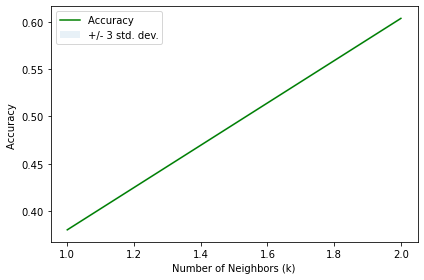

In [100]:
# Plot model accuracy for different number of neighbors k
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 std. dev.'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()